## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
a = -2
b = 1
X = np.array([*range(20)])
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [3]:
Y = a * X + b
Y

array([  1,  -1,  -3,  -5,  -7,  -9, -11, -13, -15, -17, -19, -21, -23,
       -25, -27, -29, -31, -33, -35, -37])

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def linear_Regression(x, y, alpha, itera,b):
    theta_all = []
    cost = []
    
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    h_theta = feature.dot(theta)
    j = 0
    while  (j < itera) and (abs(cost_new - cost_func)> 0.0001 or j == 0):
        cost_func = cost_new
        for i in range(0,int(n/b)):
            theta[0] = theta[0] - (alpha * (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),0]))
            theta[1] = theta[1] - (alpha * (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),1]))
            h_theta = feature.dot(theta)

            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        j +=1

    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta, theta[0], theta[1]

#### Try your function with any input parameterss of your choice.

In [5]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = linear_Regression(X,Y, 0.0001, 1000, len(X))

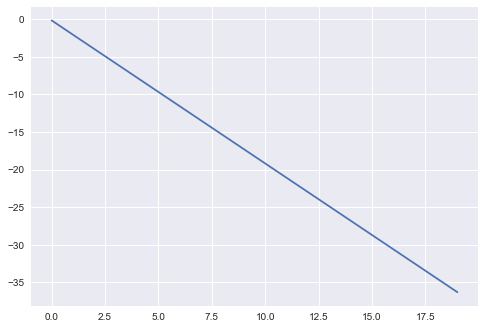

In [6]:
plt.style.use('seaborn')
plt.plot(X,h_theta)
plt.show()

#### Calculate r2 score

In [7]:
r2_score(Y, h_theta)

0.9973444095979793

#### Plot loss vs. epochs

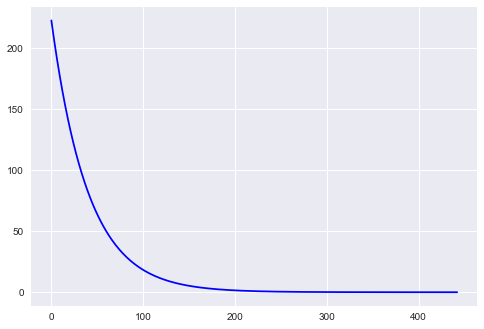

In [8]:
plt.plot([*range(len(cost))],cost,color='blue')
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

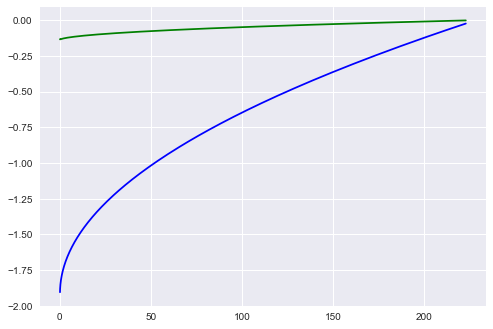

In [9]:
plt.plot(cost, thetall_0,color="green")
plt.plot(cost, thetall_1, color="blue")
plt.show()

#### Plot all regression lines till converge

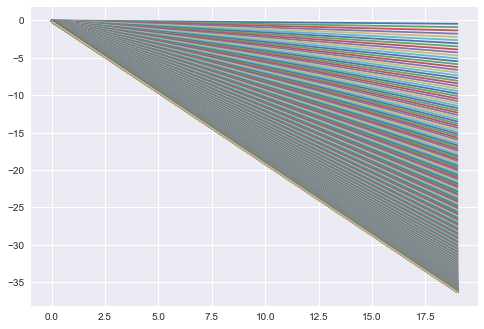

In [10]:
for i in range(len(thetall_0)):
    h = thetall_0[i] + thetall_1[i] * X
    plt.plot(X,h)
plt.show()

#### Plot the best regression line

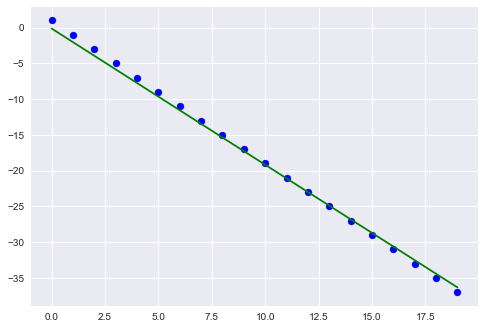

In [11]:
plt.scatter(X,Y,color="blue")
plt.plot(X,h_theta, color="green")
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [12]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = linear_Regression(X,Y, 0.01, 100,len(X))

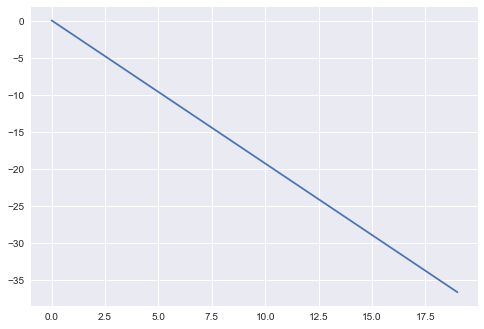

In [13]:
plt.style.use('seaborn')
plt.plot(X,h_theta)
plt.show()

In [14]:
r2_score(Y, h_theta)

0.9984408234350737

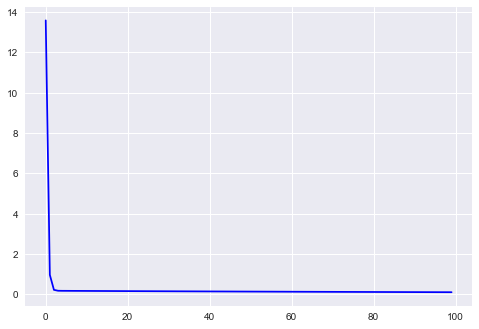

In [15]:
plt.plot([*range(len(cost))],cost,color='blue')
plt.show()

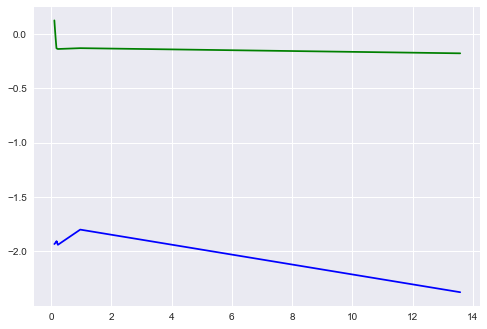

In [16]:
plt.plot(cost, thetall_0,color="green")
plt.plot(cost, thetall_1, color="blue")
plt.show()

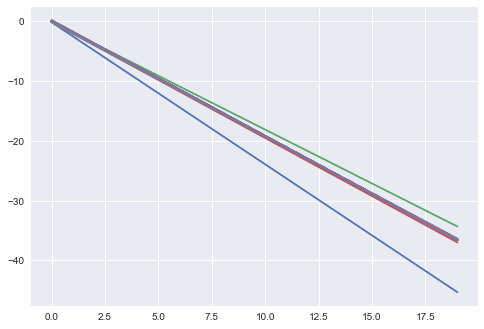

In [17]:
for i in range(len(thetall_0)):
    h = thetall_0[i] + thetall_1[i] * X
    plt.plot(X,h)
plt.show()

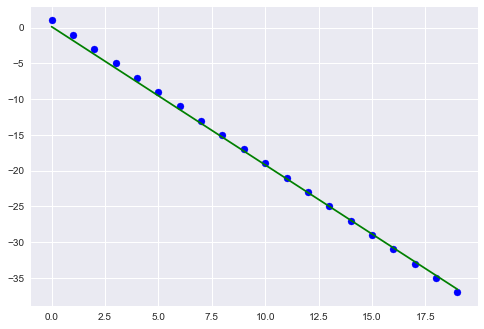

In [18]:
plt.scatter(X,Y,color="blue")
plt.plot(X,h_theta, color="green")
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [19]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = linear_Regression(X,Y, 0.0001, 1000, int(len(X)/5))

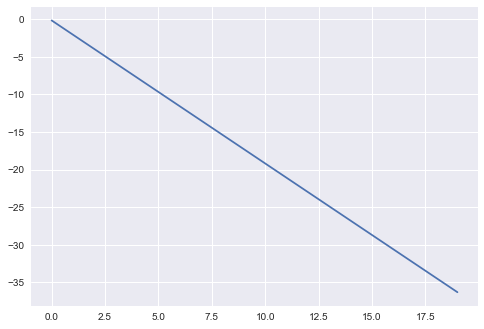

In [20]:
plt.style.use('seaborn')
plt.plot(X,h_theta)
plt.show()

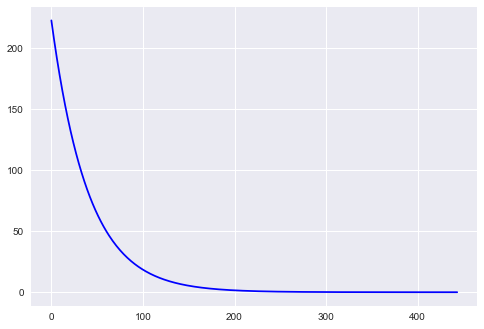

In [21]:
plt.plot([*range(len(cost))],cost,color='blue')
plt.show()

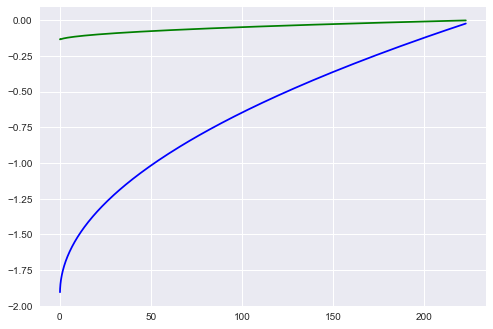

In [22]:
plt.plot(cost, thetall_0,color="green")
plt.plot(cost, thetall_1, color="blue")
plt.show()

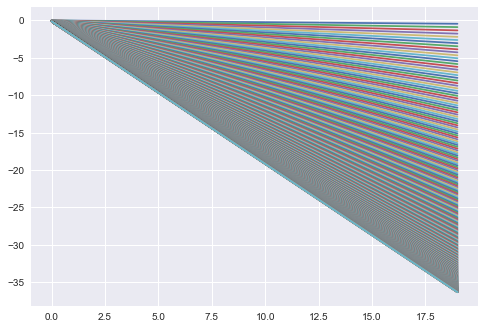

In [23]:
for i in range(len(thetall_0)):
    h = thetall_0[i] + thetall_1[i] * X
    plt.plot(X,h)
plt.show()

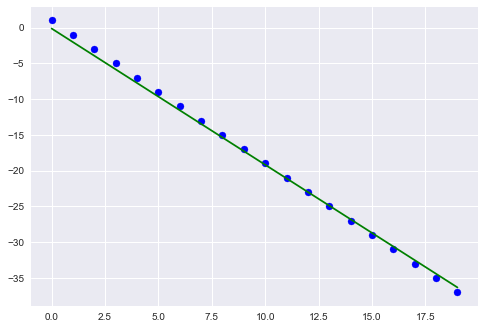

In [24]:
plt.scatter(X,Y,color="blue")
plt.plot(X,h_theta, color="green")
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [25]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = linear_Regression(X,Y, 0.0001, 1000, 1)

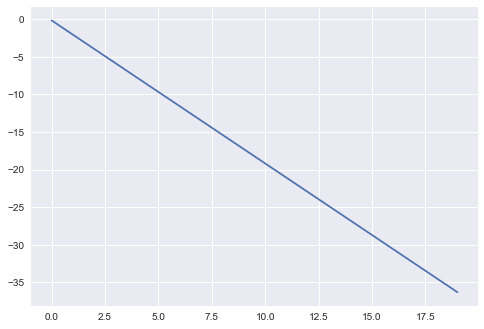

In [26]:
plt.style.use('seaborn')
plt.plot(X,h_theta)
plt.show()

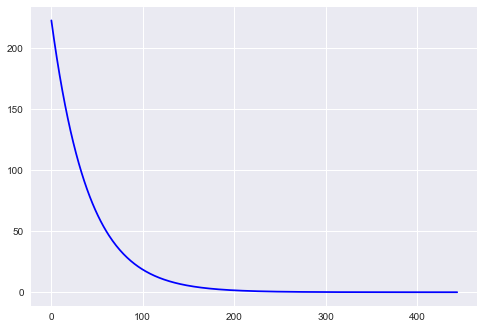

In [27]:
plt.plot([*range(len(cost))],cost,color='blue')
plt.show()

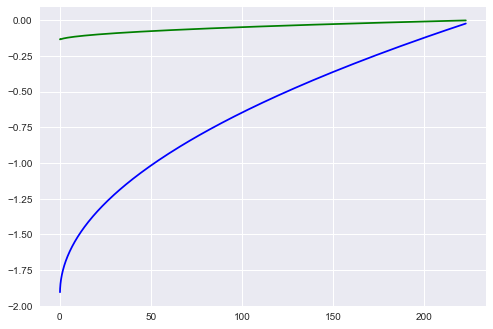

In [28]:
plt.plot(cost, thetall_0,color="green")
plt.plot(cost, thetall_1, color="blue")
plt.show()

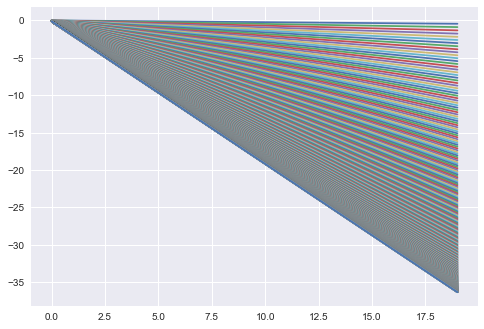

In [29]:
for i in range(len(thetall_0)):
    h = thetall_0[i] + thetall_1[i] * X
    plt.plot(X,h)
plt.show()

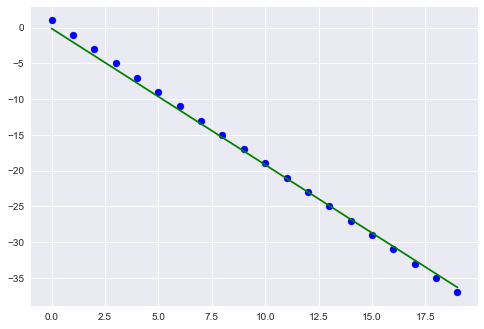

In [30]:
plt.scatter(X,Y,color="blue")
plt.plot(X,h_theta, color="green")
plt.show()